In [82]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
cast.head()

/home/gaurav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [85]:
cast_true=cast[(cast.character.str.lower()=='superman')].year.value_counts(dropna = True)-cast[(cast.character.str.lower()=='batman')].year.value_counts(dropna = True)>0
cast_true[cast_true].count()

2

In [86]:
superman_titles = cast[(cast.character == "Superman")].groupby('year').count()['title']
batman_titles = cast[(cast.character == "Batman")].groupby('year').count()['title']

all = (superman_titles - batman_titles) > 0

all[all].count()

2

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [87]:
cast_batman=cast[(cast.character.str.lower()=='batman')].year.value_counts(dropna = True)-cast[(cast.character.str.lower()=='superman')].year.value_counts(dropna = True)>0
cast_batman[cast_batman].count()

5

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [88]:
group=cast.groupby('year').type.value_counts()

cast.set_index('year', inplace=True)
cast.groupby('type')
#group.plot(kind='hist',figsize=[12,6], alpha=.4, legend=True)

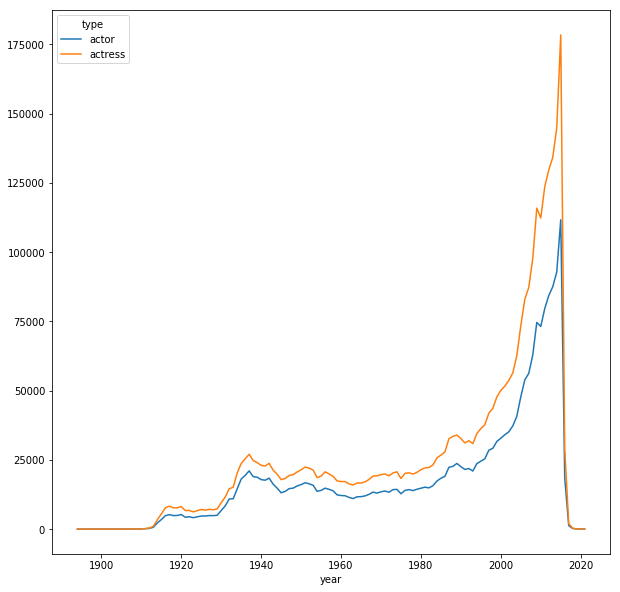

In [119]:
group = cast.groupby(['year','type']).count()
pivot = pd.pivot_table(group.reset_index(), index='year', columns='type', values='character')
pivot.plot(kind='line',figsize=(10,10),stacked=True)
#new.plot(x='year',y='character',kind='bar',figsize=(15,15))
#new[[new.type=='actor']['year'].plot()
# group
# new = group.reset_index()
# plt.plot(new[new.type == 'actor']['year'], new[new['n'] == 1]['title'], color='g')
# plt.plot(new[new.n == 2]['year'], new[new['n'] == 2]['title'], color='red')
# # plt.plot(new[new.n == 3]['year'], new[new['n'] == 3]['title'], color='orange')
#  plt.show()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

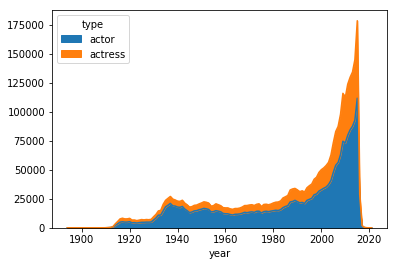

In [114]:
pivot.plot(kind='area', stacked=True)

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

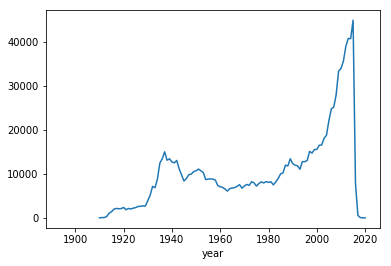

In [10]:
(cast_actor-cast_actress).plot()

In [7]:
difference=cast[(cast.type=='actor')].year.value_counts(dropna = True)-cast[(cast.type=='actress')].year.value_counts(dropna = True)
difference
# difference.plot(kind='line',figsize=(10,10))

1894        1.0
1899        NaN
1900        NaN
1905        NaN
1906       11.0
1907        NaN
1908       16.0
1909        NaN
1910       25.0
1911       72.0
1912       93.0
1913      308.0
1914     1078.0
1915     1415.0
1916     2000.0
1917     2160.0
1918     2073.0
1919     2127.0
1920     2382.0
1921     1869.0
1922     2143.0
1923     2041.0
1924     2221.0
1925     2349.0
1926     2606.0
1927     2632.0
1928     2740.0
1929     2688.0
1930     3906.0
1931     5175.0
         ...   
1992    11841.0
1993    11063.0
1994    12794.0
1995    12783.0
1996    13057.0
1997    15120.0
1998    14738.0
1999    15546.0
2000    15566.0
2001    16525.0
2002    16584.0
2003    18123.0
2004    18805.0
2005    22159.0
2006    24785.0
2007    25181.0
2008    28033.0
2009    33353.0
2010    33981.0
2011    35653.0
2012    38997.0
2013    40785.0
2014    40749.0
2015    44936.0
2016     7770.0
2017      562.0
2018       82.0
2019       17.0
2020       11.0
2021        NaN
Name: year, Length: 120,

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

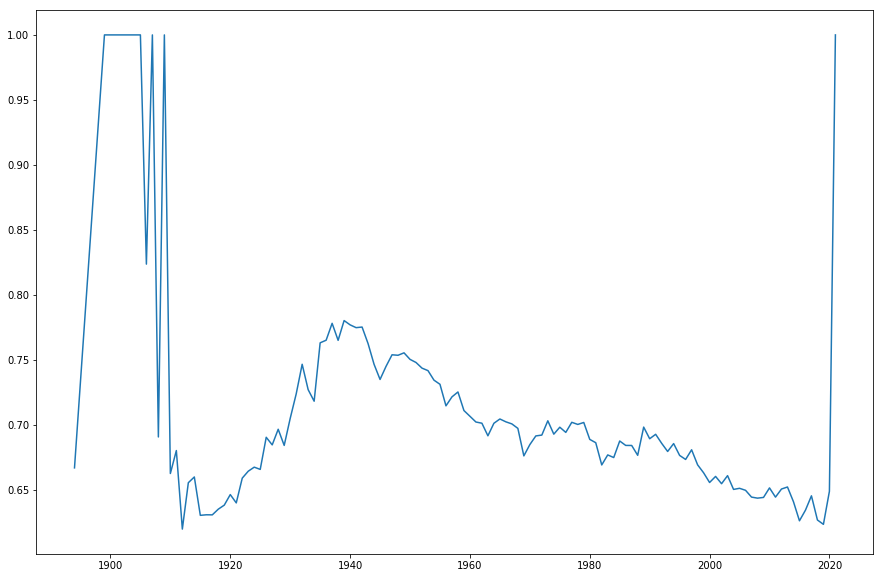

In [17]:
#cast.dropna(subset = ['type'])
(cast[cast.type=='actor'].year.value_counts()/cast.year.value_counts()).plot(figsize=(15,10))
#cast[cast.type=='actress'].year.value_counts()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

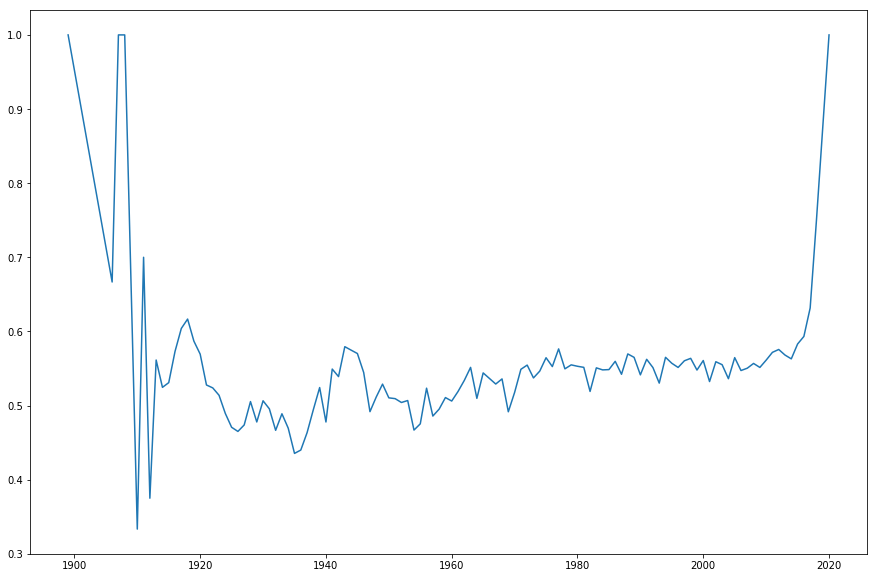

In [22]:
(cast[(cast.type=='actor')&(cast.n==2)].year.value_counts()/cast[(cast.n==2)].year.value_counts()).plot(kind='line',figsize=(15,10))

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [ ]:
cast.loc[cast.type == 'actor', 'n'].value_counts(normalize=True)
cast.groupby(['type']).year.value_counts()

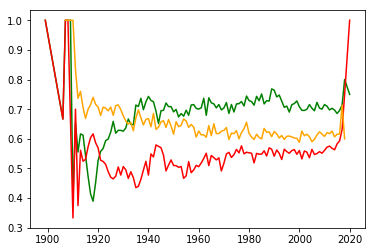

In [64]:
group = cast[(cast.n < 4) & (cast.n > 0) & (cast.type=='actor')].groupby(['n', 'year']).count()['title']/cast[(cast.n < 4) & (cast.n > 0)].groupby(['n', 'year']).count()['title']
group
new = group.reset_index()

plt.plot(new[new.n == 1]['year'], new[new['n'] == 1]['title'], color='g')
plt.plot(new[new.n == 2]['year'], new[new['n'] == 2]['title'], color='red')
plt.plot(new[new.n == 3]['year'], new[new['n'] == 3]['title'], color='orange')
plt.show()

In [40]:
cast[(cast.n < 4) & (cast.n > 0)].groupby(['n', 'year']).count()['title']

n    year
1.0  1899       2
     1906       3
     1907       1
     1908       1
     1909       1
     1910       5
     1911      26
     1912      27
     1913     133
     1914     364
     1915     662
     1916     949
     1917    1067
     1918     952
     1919     967
     1920     954
     1921     787
     1922     752
     1923     606
     1924     694
     1925     755
     1926     739
     1927     769
     1928     776
     1929     665
     1930     727
     1931     812
     1932     868
     1933     823
     1934     885
             ... 
3.0  1989    1200
     1990    1175
     1991    1135
     1992    1113
     1993    1124
     1994    1144
     1995    1252
     1996    1280
     1997    1467
     1998    1505
     1999    1661
     2000    1782
     2001    1809
     2002    1917
     2003    1915
     2004    2001
     2005    2218
     2006    2450
     2007    2517
     2008    2744
     2009    3219
     2010    3099
     2011    3465
     2012    3473
